In [77]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
from datetime import datetime



In [3]:
def load_img():
    blank_img = np.zeros(shape=(600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCD',org=(60, 500), fontFace=font,fontScale=5, color = (255, 0,0), thickness=30 )
    return blank_img

In [25]:
def dilate_img(src, kernel):
    K, L = src.shape
    dist = np.zeros((K, L), dtype=np.uint8)
    for i in range(K-1):
        for j in range(L-1):
            if src[i, j] > 0:
                for a, b in kernel:
                    dist[i+a, b+j] = 1
    return dist

In [80]:
arr = [[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]]
original_img = np.array(arr, dtype= np.uint8)
original_img = load_img()
img = original_img

struct_element = [(-1,-1), (-1,0), (-1,1), (0,-1 ), (0, 0), (0,1), (1,-1), (1,0), (1,1)]

# cross shape structuring element
# struct_element = [(-1,0), (0,-1),(0, 0), (0,1), (1,0)]



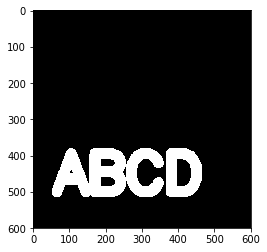

In [81]:
plt.imshow(img, cmap='gray')

## Dilation

0:01:12.375562


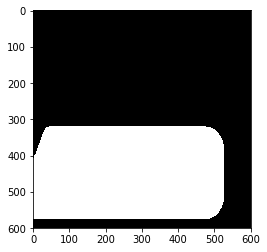

In [85]:
start_time  = datetime.utcnow()
for i in range(50):
    img = dilute_img(img, struct_element)
end_time  = datetime.utcnow()
print(end_time - start_time)

plt.imshow(img, cmap='gray', vmin=0, vmax=1)

0:00:00.050766


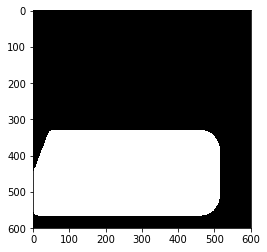

In [86]:
kernel = np.ones((3,3))
'''
kernel = [[0., 1., 0.],
          [1., 1., 1.],
          [0., 1., 0.]]
kernel = np.array(kernel, dtype=np.uint8)
'''
start_time  = datetime.utcnow()
img = cv2.dilate(original_img, kernel=kernel, iterations=50)
end_time  = datetime.utcnow()
print(end_time - start_time)

plt.imshow(img, cmap="gray")

# Properties of dilation
-  X (dilate) B = B (dilate) X

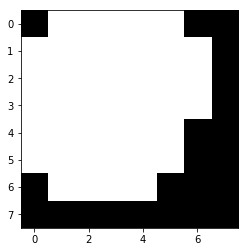

In [36]:


result = cv2.dilate(kernel, kernel=original_img, iterations=1)
plt.imshow(img, cmap="gray")

- A (dilate) (B (dilate) C) =  (A (dilate) B) (dilate) C

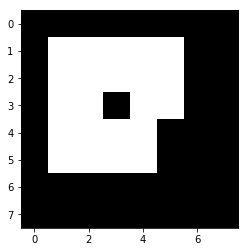

In [63]:
k1 = np.ones((3,3))

k2 = [[0., 1., 0.],
     [1., 1., 1.],
     [0., 1., 0.]]
k2 = np.array(k2, dtype=np.uint8)
# k2 = np.ones((3,3))
plt.imshow(original_img, cmap='gray')

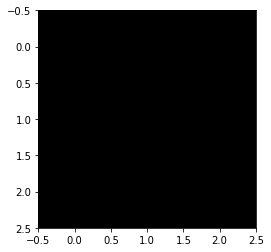

In [65]:
# result = cv2.dilate(original_img, 
#                     kernel=cv2.dilate(k1, kernel=k2, iterations=1), 
#                     iterations=1)
plt.imshow(cv2.dilate(k1, kernel=k2, iterations=1), cmap='gray')

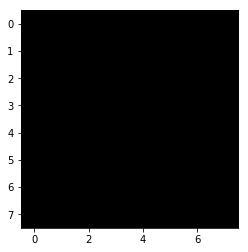

In [62]:
result = cv2.dilate(cv2.dilate(original_img, kernel=k1, iterations=1), 
                    kernel=k2, 
                    iterations=1)
plt.imshow(result, cmap='gray')